In [1]:
%pylab --no-import-all notebook
from math import sqrt, factorial, isnan
import warnings
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import pandas as pd

import itertools as it
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "new_seznam.npy").tolist()
trlist

['No116.npy',
 'No101.npy',
 'No100.npy',
 'No128.npy',
 'No221.npy',
 'No127.npy',
 'No104.npy',
 'No222.npy',
 'No106.npy',
 'No218.npy']

<IPython.core.display.Javascript object>


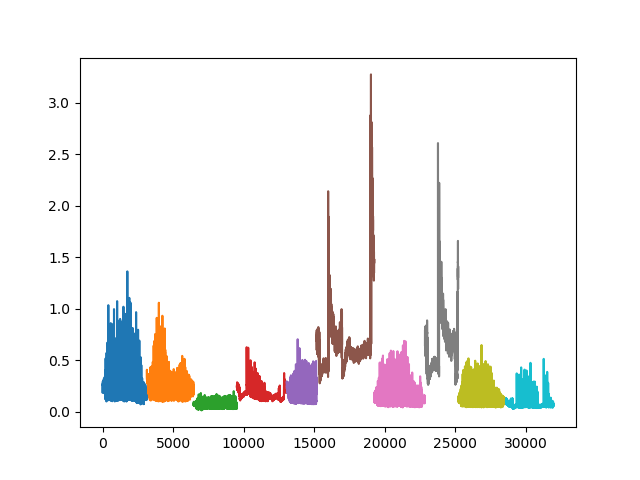

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist]
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


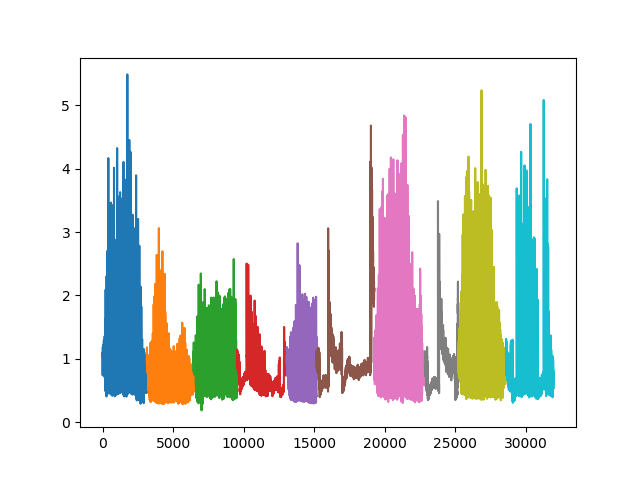

In [4]:
norma = [CL.Normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist]
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i)
    posun = posun +len(i) 
plt.show()

In [4]:
train_data = []
for data in trlist:
    train_data.append(np.load(way1 + data))


In [5]:
G_HMM = GaussianHMM(3, covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

In [10]:
#validace = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
#                      delka_okna =[4, 8, 12, 10], parametry  = [0,0,1,1,1], unsupervised = False)

In [6]:
validace = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(5,17)], parametry  = [], unsupervised = False)

[                                                                        ] N/A%

počet všech možných kombinací je  13380


[########################################################################] 100%


In [7]:
valid_path = way = os.getcwd() + "/Validační tabulky/"
#validace.to_csv(valid_path + 'Modifikovaný_HMM_1.csv',index=False)

In [10]:
val = pd.read_csv(valid_path + "Modifikovaný_HMM_1.csv")
val.head()

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 12, 5)",0.557967,1487,0.714774,0.003839,0.159091,0.292568,0.556146,0.014493,1.0,1.000000,0.002212,0.086420
1,"(0, 0, 0, 1, 0)","(0, 0, 12, 5)",0.558859,1484,0.779987,0.072549,0.157595,0.336710,0.646906,0.065141,1.0,0.982002,0.081858,0.085538
2,"(0, 0, 0, 1, 1)","(0, 0, 12, 5)",0.573722,1434,0.770779,0.052452,0.226740,0.349990,0.630637,0.054118,1.0,0.991001,0.050885,0.127866
3,"(0, 0, 1, 0, 0)","(0, 0, 12, 5)",0.562426,1472,0.778592,0.090271,0.153094,0.340652,0.643303,0.082569,1.0,0.985939,0.099558,0.082892
4,"(0, 0, 1, 0, 1)","(0, 0, 12, 5)",0.575208,1429,0.767225,0.063529,0.223962,0.351572,0.625221,0.067839,1.0,0.992688,0.059735,0.126102


In [11]:
Sorted = val.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
12131,"(0, 1, 0, 1, 1)","(6, 10, 12, 12)",0.787753,714,0.848889,0.591422,0.767172,0.735828,0.838639,0.603687,0.776173,0.859393,0.579646,0.758377
226,"(0, 1, 0, 1, 0)","(0, 0, 12, 12)",0.741677,869,0.887878,0.004415,0.657998,0.516764,0.846861,1.000000,0.594729,0.933071,0.002212,0.736332
11697,"(0, 1, 0, 1, 1)","(6, 10, 0, 10)",0.720571,940,0.826810,0.119048,0.659176,0.535011,0.731602,0.576923,0.702595,0.950506,0.066372,0.620811
6178,"(0, 1, 0, 1, 0)","(4, 8, 12, 12)",0.717598,950,0.813203,0.004415,0.686499,0.501372,0.719291,1.000000,0.713606,0.935321,0.002212,0.661376
10529,"(1, 0, 1, 0, 1)","(6, 8, 12, 8)",0.714625,960,0.805955,0.021786,0.692273,0.506672,0.721137,0.714286,0.701357,0.913386,0.011062,0.683422
8108,"(1, 0, 0, 1, 0)","(4, 10, 14, 14)",0.713436,964,0.819126,0.044444,0.705161,0.522910,0.717732,0.078652,0.838396,0.953881,0.030973,0.608466
11094,"(1, 1, 1, 0, 0)","(6, 8, 14, 14)",0.711950,969,0.793575,0.004415,0.702471,0.500154,0.691601,1.000000,0.761856,0.930821,0.002212,0.651675
12317,"(0, 1, 0, 1, 1)","(6, 10, 14, 6)",0.704518,994,0.793776,0.004415,0.670391,0.489527,0.676028,1.000000,0.790419,0.961192,0.002212,0.582011
677,"(1, 1, 0, 1, 1)","(0, 0, 14, 14)",0.704518,994,0.784705,0.024048,0.701149,0.503301,0.667324,0.127660,0.860256,0.952193,0.013274,0.591711
12334,"(1, 1, 1, 0, 0)","(6, 10, 14, 6)",0.703627,997,0.794226,0.028340,0.686539,0.503035,0.702902,0.166667,0.727542,0.912823,0.015487,0.649912


In [23]:
Sorted

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
12131,"(0, 1, 0, 1, 1)","(6, 10, 12, 12)",0.787753,714,0.848889,0.591422,0.767172,0.735828,0.838639,0.603687,0.776173,0.859393,0.579646,0.758377
226,"(0, 1, 0, 1, 0)","(0, 0, 12, 12)",0.741677,869,0.887878,0.004415,0.657998,0.516764,0.846861,1.000000,0.594729,0.933071,0.002212,0.736332
11697,"(0, 1, 0, 1, 1)","(6, 10, 0, 10)",0.720571,940,0.826810,0.119048,0.659176,0.535011,0.731602,0.576923,0.702595,0.950506,0.066372,0.620811
6178,"(0, 1, 0, 1, 0)","(4, 8, 12, 12)",0.717598,950,0.813203,0.004415,0.686499,0.501372,0.719291,1.000000,0.713606,0.935321,0.002212,0.661376
10529,"(1, 0, 1, 0, 1)","(6, 8, 12, 8)",0.714625,960,0.805955,0.021786,0.692273,0.506672,0.721137,0.714286,0.701357,0.913386,0.011062,0.683422
8108,"(1, 0, 0, 1, 0)","(4, 10, 14, 14)",0.713436,964,0.819126,0.044444,0.705161,0.522910,0.717732,0.078652,0.838396,0.953881,0.030973,0.608466
11094,"(1, 1, 1, 0, 0)","(6, 8, 14, 14)",0.711950,969,0.793575,0.004415,0.702471,0.500154,0.691601,1.000000,0.761856,0.930821,0.002212,0.651675
12317,"(0, 1, 0, 1, 1)","(6, 10, 14, 6)",0.704518,994,0.793776,0.004415,0.670391,0.489527,0.676028,1.000000,0.790419,0.961192,0.002212,0.582011
677,"(1, 1, 0, 1, 1)","(0, 0, 14, 14)",0.704518,994,0.784705,0.024048,0.701149,0.503301,0.667324,0.127660,0.860256,0.952193,0.013274,0.591711
12334,"(1, 1, 1, 0, 0)","(6, 10, 14, 6)",0.703627,997,0.794226,0.028340,0.686539,0.503035,0.702902,0.166667,0.727542,0.912823,0.015487,0.649912


In [24]:
CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
                      delka_okna =[4, 10, 0, 10], parametry  = [0,0,1,1,1], unsupervised = False)

ValueError: component 0 of 'full' covars must be symmetric, positive-definite